# Все классификационные модели. SMOTE.

## Загружаем необходимые библиотеки

In [62]:
import pandas as pd # для загрузки данных и применения One-Hot Encoding
import numpy as np # для расчета среднего и стандартного отклонения
import matplotlib.pyplot as plt # для создания графиков
import seaborn as sns # для создания статистических графиков
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # для построения дерева классификации
from sklearn.tree import plot_tree # для отрисовки дерева классификации
from sklearn.model_selection import train_test_split # для разделения данных на тренировочные и тестовые
from sklearn.model_selection import cross_val_score # для кросс валидации
from sklearn.metrics import confusion_matrix # для создания матрицы ошибок
from sklearn.metrics import plot_confusion_matrix # для отрисовки матрицы ошибок
from sklearn.metrics import classification_report # для метрик классификации

In [63]:
from google.colab import  files
uploaded = files.upload()

Saving DS_PVT_ID_NUMBER_BASE_01_AFTER_NORM_02.xlsx to DS_PVT_ID_NUMBER_BASE_01_AFTER_NORM_02 (2).xlsx


In [64]:
df = pd.read_excel(open('DS_PVT_ID_NUMBER_BASE_01_AFTER_NORM_02.xlsx', 'rb'))

In [65]:
# смотрим первые 5 строк
df.head()

,ID_Number,PVT,Etiology_simple,Ascites_simple,EVL_simple,PH_dur_simple,Age_NORM,HB_NORM,PLT_NORM,ALB_NORM,TB_NORM,INR_NORM,Spl_lenth_NORM,PV_diam_NORM
0,Case_001,1,0,0,0,1,0.567,0.570,0.394,0.250,0.185,0.431,0.497,0.472
1,Case_002,1,0,1,0,0,0.582,0.599,0.503,0.433,0.407,0.775,0.355,0.602
2,Case_003,1,0,1,0,0,0.806,0.427,0.110,0.500,0.160,0.814,0.781,0.648
3,Case_004,1,0,1,0,0,0.657,0.690,0.342,0.500,0.790,0.686,0.516,0.231
4,Case_005,1,1,1,0,0,0.552,0.683,0.155,0.555,0.136,0.588,0.445,0.435


In [66]:
# описывем датафрейм (первая цифра - число строк, вторая - число столбцов)
df.shape

(841, 14)

## Идентифицируем пропущенные значения

In [67]:
# получаем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Number        841 non-null    object 
 1   PVT              841 non-null    int64  
 2   Etiology_simple  841 non-null    int64  
 3   Ascites_simple   841 non-null    int64  
 4   EVL_simple       841 non-null    int64  
 5   PH_dur_simple    841 non-null    int64  
 6   Age_NORM         841 non-null    float64
 7   HB_NORM          841 non-null    float64
 8   PLT_NORM         841 non-null    float64
 9   ALB_NORM         841 non-null    float64
 10  TB_NORM          841 non-null    float64
 11  INR_NORM         841 non-null    float64
 12  Spl_lenth_NORM   841 non-null    float64
 13  PV_diam_NORM     841 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory usage: 92.1+ KB


In [68]:
df = df.drop('ID_Number', axis = 1) # удаляем столбец с идентификационными данными

In [70]:
df.head()

,PVT,Etiology_simple,Ascites_simple,EVL_simple,PH_dur_simple,Age_NORM,HB_NORM,PLT_NORM,ALB_NORM,TB_NORM,INR_NORM,Spl_lenth_NORM,PV_diam_NORM
0,1,0,0,0,1,0.567,0.570,0.394,0.250,0.185,0.431,0.497,0.472
1,1,0,1,0,0,0.582,0.599,0.503,0.433,0.407,0.775,0.355,0.602
2,1,0,1,0,0,0.806,0.427,0.110,0.500,0.160,0.814,0.781,0.648
3,1,0,1,0,0,0.657,0.690,0.342,0.500,0.790,0.686,0.516,0.231
4,1,1,1,0,0,0.552,0.683,0.155,0.555,0.136,0.588,0.445,0.435


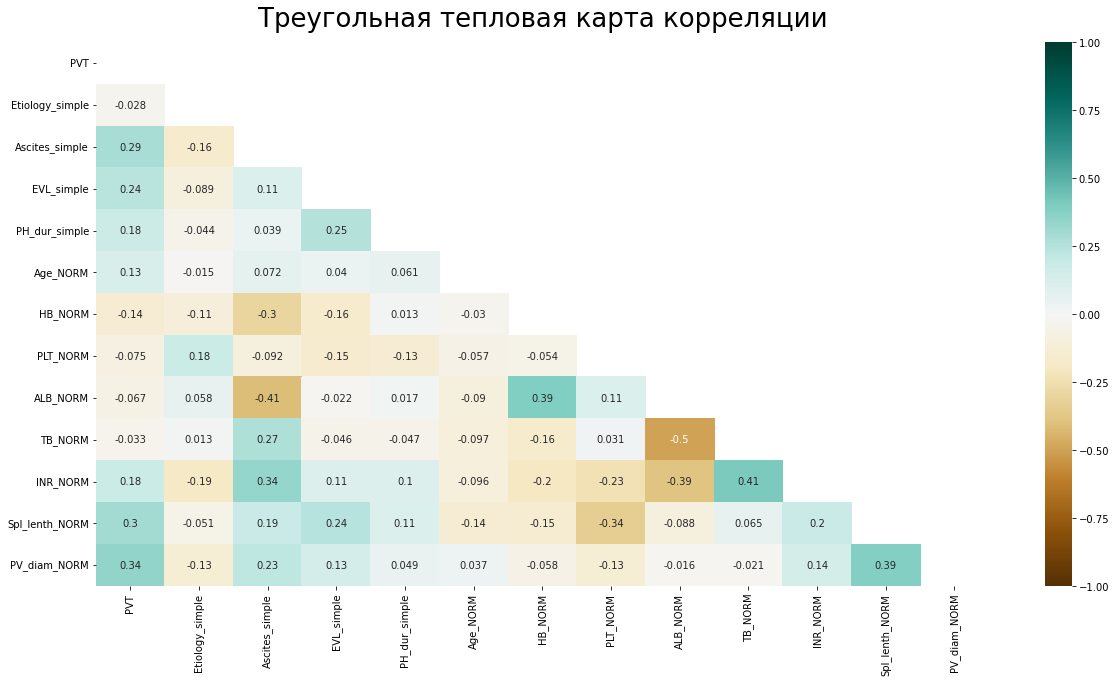

In [71]:
plt.figure(figsize=(20, 10)) 
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_)) 
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict={'fontsize':26}, pad=16);

## Разделяем данные на зависимую переменную y и предикторы X

In [72]:
# X (всегда заглавная буква) - предикторы
X = df.drop('PVT', axis=1).copy()
X.head() # смотрим первые 5 строк: целевая переменная PVT отсутствует

,Etiology_simple,Ascites_simple,EVL_simple,PH_dur_simple,Age_NORM,HB_NORM,PLT_NORM,ALB_NORM,TB_NORM,INR_NORM,Spl_lenth_NORM,PV_diam_NORM
0,0,0,0,1,0.567,0.570,0.394,0.250,0.185,0.431,0.497,0.472
1,0,1,0,0,0.582,0.599,0.503,0.433,0.407,0.775,0.355,0.602
2,0,1,0,0,0.806,0.427,0.110,0.500,0.160,0.814,0.781,0.648
3,0,1,0,0,0.657,0.690,0.342,0.500,0.790,0.686,0.516,0.231
4,1,1,0,0,0.552,0.683,0.155,0.555,0.136,0.588,0.445,0.435


In [73]:
# y (строчная букава) - целевая переменная (классификационная)
# создаем копию столбца, в котором содержится целевая переменная
y = df['PVT'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PVT, dtype: int64

In [74]:
# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
# балансируем обучающую выборку

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [ ]:
from collections import Counter
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train))
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train_smote))

Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({0: 530, 1: 100})
Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({0: 530, 1: 530})


# Строим классификаторы, основанные на нелинейных моделях

## Random Forest Classifier

In [78]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_smote,y_train_smote)
rf_clf.score(X_test,y_test)

0.8341232227488151

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


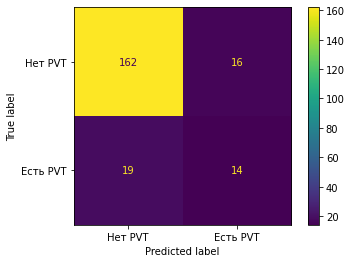

In [79]:
# Проверяем как этот классификатор работает на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [81]:
# получаем метрики классификации
report = classification_report(y_test, rf_clf.predict(X_test), target_names=['Нет PVT', 'Есть PVT'])
print(report)

              precision    recall  f1-score   support

     Нет PVT       0.90      0.91      0.90       178
    Есть PVT       0.47      0.42      0.44        33

    accuracy                           0.83       211
   macro avg       0.68      0.67      0.67       211
weighted avg       0.83      0.83      0.83       211



## Decision Forest Classifier

In [82]:
from sklearn import tree
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train_smote,y_train_smote)
dt_clf.score(X_test,y_test)

0.7156398104265402

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


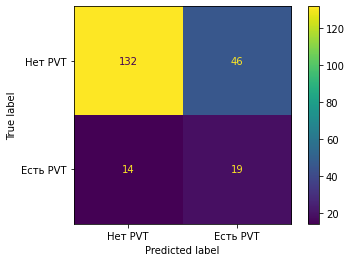

In [83]:
# Проверяем этот классификатор работает на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [ ]:
report = classification_report(y_test, dt_clf.predict(X_test), target_names=['Нет PVT', 'Есть PVT'])
print(report)

              precision    recall  f1-score   support

     Нет PVT       0.91      0.75      0.82       178
    Есть PVT       0.31      0.61      0.41        33

    accuracy                           0.73       211
   macro avg       0.61      0.68      0.62       211
weighted avg       0.82      0.73      0.76       211



## Naive Bayes Classifier

In [84]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train_smote,y_train_smote)
nb_clf.score(X_test,y_test)

0.7725118483412322

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


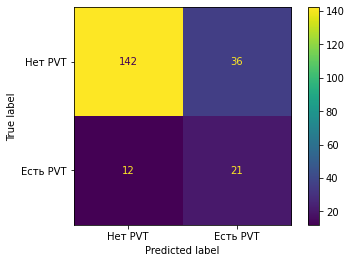

In [85]:
# Проверяем этот классификатор работает на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(nb_clf, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [86]:
report = classification_report(y_test, nb_clf.predict(X_test), target_names=['Нет PVT', 'Есть PVT'])
print(report)

              precision    recall  f1-score   support

     Нет PVT       0.92      0.80      0.86       178
    Есть PVT       0.37      0.64      0.47        33

    accuracy                           0.77       211
   macro avg       0.65      0.72      0.66       211
weighted avg       0.84      0.77      0.79       211



## K-Nearest Neighbor Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = GaussianNB()
knn_clf.fit(X_train_smote,y_train_smote)
knn_clf.score(X_test,y_test)

0.7725118483412322

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


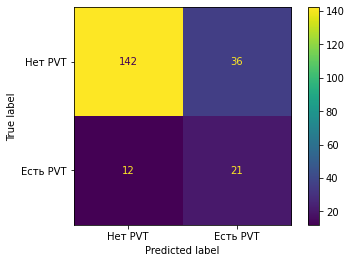

In [88]:
# Проверяем этот классификатор работает на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(knn_clf, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [90]:
report = classification_report(y_test, knn_clf.predict(X_test), target_names=['Нет PVT', 'Есть PVT'])
print(report)

              precision    recall  f1-score   support

     Нет PVT       0.92      0.80      0.86       178
    Есть PVT       0.37      0.64      0.47        33

    accuracy                           0.77       211
   macro avg       0.65      0.72      0.66       211
weighted avg       0.84      0.77      0.79       211



# Строим классификаторы на основе линейных моделей

## Logistic Regression Classifier

In [91]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_smote,y_train_smote)
lr_clf.score(X_test,y_test)

0.7772511848341233

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


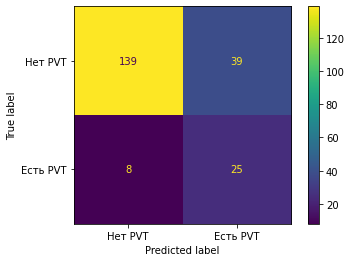

In [92]:
# Проверяем этот классификатор работает на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(lr_clf, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [93]:
report = classification_report(y_test, lr_clf.predict(X_test), target_names=['Нет PVT', 'Есть PVT'])
print(report)

              precision    recall  f1-score   support

     Нет PVT       0.95      0.78      0.86       178
    Есть PVT       0.39      0.76      0.52        33

    accuracy                           0.78       211
   macro avg       0.67      0.77      0.69       211
weighted avg       0.86      0.78      0.80       211



## SVM Classifier

In [94]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(X_train_smote,y_train_smote)
sv_clf.score(X_test,y_test)

0.7819905213270142

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


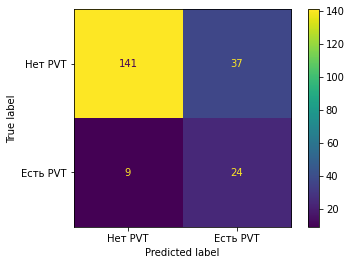

In [95]:
# Проверяем этот классификатор работает на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(sv_clf, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [96]:
report = classification_report(y_test, sv_clf.predict(X_test), target_names=['Нет PVT', 'Есть PVT'])
print(report)

              precision    recall  f1-score   support

     Нет PVT       0.94      0.79      0.86       178
    Есть PVT       0.39      0.73      0.51        33

    accuracy                           0.78       211
   macro avg       0.67      0.76      0.69       211
weighted avg       0.85      0.78      0.81       211



# Prediction Probabilities

In [57]:
r_prob = [0 for _ in range(len(y_test))]
rf_probs = rf_clf.predict_proba(X_test)
nb_probs = nb_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
lr_probs = lr_clf.predict_proba(X_test)
sv_probs = sv_clf.predict_proba(X_test)


In [58]:
rf_probs = rf_probs[:,1]
nb_probs = nb_probs[:,1]
dt_probs = dt_probs[:,1]
knn_probs = knn_probs[:,1]
lr_probs = lr_probs[:,1]
sv_probs = sv_probs[:,1]

# AUROC

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score # вычисление значений
# r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
sv_auc = roc_auc_score(y_test, sv_probs)


In [61]:
#print("Random Prediction: AUROC = %.3f" %(r_auc))
print("Random Forest: AUROC = %.3f" %(rf_auc))
print("Naive Bayes: AUROC = %.3f" %(nb_auc))
print("Decision Tree: AUROC = %.3f" %(dt_auc))
print("KNN: AUROC = %.3f" %(knn_auc))
print("Logistic regression: AUROC = %.3f" %(lr_auc))
print("SVM: AUROC = %.3f" %(sv_auc))

Random Forest: AUROC = 0.816
Naive Bayes: AUROC = 0.795
Decision Tree: AUROC = 0.724
KNN: AUROC = 0.795
Logistic regression: AUROC = 0.865
SVM: AUROC = 0.868
